# Notebook purpose
Find any scan that has anomalies.

The idea I will apply is to count up the number of non-zero values in each mode in a slice.
If a particular mode in a slice has a vastly different amount of non-zero values,
it is likely to be an outlier. I will use the first patient scans to try to determine a 
threshold for this. I've looked at all slices of this scan to ensure it isn't an outlier itself.

In [8]:
import utils.hgg_utils as hu
import numpy as np

In [10]:
test_scan = hu.get_patient_data_at_index(0)

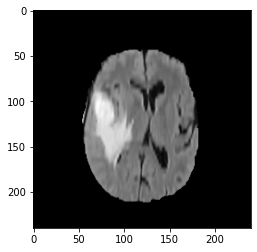

In [11]:
hu.display_slice(test_scan, slice_num=80, image_type="flair")

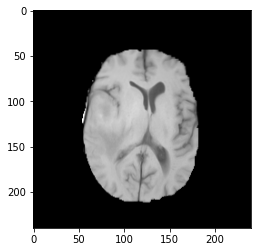

In [12]:
hu.display_slice(test_scan, slice_num=80, image_type="t1")

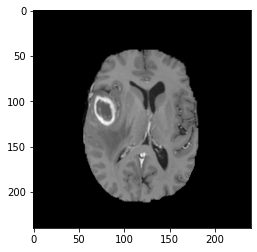

In [13]:
hu.display_slice(test_scan, slice_num=80, image_type="t1ce")

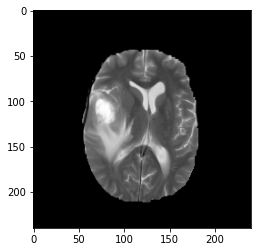

In [14]:
hu.display_slice(test_scan, slice_num=80, image_type="t2")

In [19]:
num_nonzeros = np.empty([155, 4])

for slice in range(len(test_scan)):
    num_nonzeros[slice][0] = np.count_nonzero(test_scan[slice]['flair'])
    num_nonzeros[slice][1] = np.count_nonzero(test_scan[slice]['t1'])
    num_nonzeros[slice][2] = np.count_nonzero(test_scan[slice]['t1ce'])
    num_nonzeros[slice][3] = np.count_nonzero(test_scan[slice]['t2'])

### Now find the difference between the mode with the most non-zeros and mode with the least.

In [21]:
max_min_diff = np.ptp(num_nonzeros, axis=1)

Slice 10 has a massive difference... Let's look at it to see why.

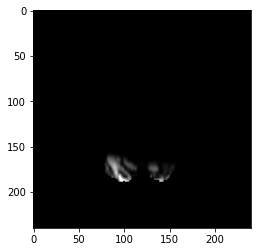

In [22]:
hu.display_slice(test_scan, slice_num=10, image_type="flair")

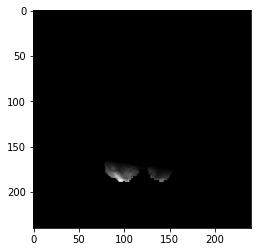

In [23]:
hu.display_slice(test_scan, slice_num=10, image_type="t1")

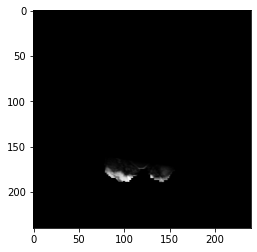

In [24]:
hu.display_slice(test_scan, slice_num=10, image_type="t1ce")

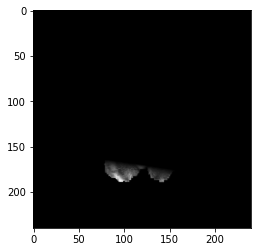

In [25]:
hu.display_slice(test_scan, slice_num=10, image_type="t2")

In [26]:
print()
print("Mean= ", np.mean(max_min_diff))
print("Median= ", np.median(max_min_diff))
print("Max/Min=", max_min_diff.max(), " ", max_min_diff.min())
print("StdDev=", np.std(max_min_diff))
print("90th Percentile", np.percentile(max_min_diff, 90))


Mean=  32.774193548387096
Median=  24.0
Max/Min= 567.0   0.0
StdDev= 50.956850612549005
90th Percentile 59.599999999999994


The max shown above is from slice 10, which looking at the slice we that t2 looks 
like it may have been cut off a little bit. This one is probably find for our data.

The standard deviation is about 60 but as we can see even if a small amount of the image is 
cut off it will make a massive difference in the number of non-zero values so I'm going to
use a threshold of 250.

In [29]:
threshold = 1000

# 259 HGG folders
for i in range(1, 259):
    scan = hu.get_patient_data_at_index(i)
    for slice in range(len(scan)):
        if threshold < np.ptp([np.count_nonzero(scan[slice]['flair']),
                         np.count_nonzero(scan[slice]['t1']),
                         np.count_nonzero(scan[slice]['t1ce']),
                         np.count_nonzero(scan[slice]['t2'])]):
            print("Potential outlier at patient: ", i)
            break

Potential outlier at patient:  1
Potential outlier at patient:  2
Potential outlier at patient:  6
Potential outlier at patient:  7
Potential outlier at patient:  8
Potential outlier at patient:  12
Potential outlier at patient:  13
Potential outlier at patient:  14
Potential outlier at patient:  16
Potential outlier at patient:  17
Potential outlier at patient:  207
Potential outlier at patient:  214
Potential outlier at patient:  221
Potential outlier at patient:  227
Potential outlier at patient:  241
Potential outlier at patient:  250
Potential outlier at patient:  254


#### I don't think all of these should be removed. Most are not cut off too bad. 

Can someone help me output the file path instead of a patient number? it would make looking at these a lot easier.
